# Nội dung 
1. ** Định nghĩa vấn đề **
2. ** Chuẩn bị dữ liệu **
3. ** Phân tích dữ liệu **
4. ** Xử lí dữ liệu **


## I. Định nghĩa vấn đề (Define Problem)
- ** Mô tả ( phân tích paper)**
    + Mục tiêu chính của báo cáo Tham vấn WHO này là đánh giá lại các vấn đề liên quan đến bệnh đái tháo đường và cập nhật, tinh chỉnh cả phân loại và tiêu chí chẩn đoán
    + Các mục tiêu cụ thể xuất hiện do sự phát triển của kiến thức:
        - Giải quyết sự Hỗn loạn danh pháp: Báo cáo được biên soạn trong bối cảnh đã có nhiều dữ liệu mới và thông tin bệnh nguyên rõ ràng hơn kể từ các tiêu chí chẩn đoán và phân loại trước đây (năm 1970 và 1985), vốn đã mang lại trật tự cho một tình trạng hỗn loạn về danh pháp và tiêu chí chẩn đoán
        -  Cập nhật tiêu chí chẩn đoán: Đề xuất thay đổi lớn trong tiêu chí chẩn đoán nồng độ glucose huyết tương lúc đó
        - Cung cấp thông tin Nguyên nhân bệnh sinh: Phân loại phản ánh sự hiểu biết tốt hơn về các nguyên nhân gây ra bệnh đái tháo đường
        -  Bao gồm định nghĩa Hội chứng Chuyển hóa: Báo cáo đặt mục tiêu bao gồm định nghĩa về "Hội chứng Chuyển hóa" ("Metabolic Syndrome")
- ** Dữ liệu vào** 
    + Pregnancies
    + Glucose
    + BloodPressure
    + SkinThickness
    + Insulin
    + BMI
    + DiabetesPedigreeFunction
    + Age
- Kết quả: class (0,1)


## II. Chuẩn bị dữ liệu


### II.1 Khai báo thư viện


**numpy**: thư viện tính toán số học, hỗ trợ xử lí mảng, ma trận và các phép toán phức tạp.
ứng dụng EDA: Xử lí giá trị thiếu, tính toán thống kê, phân tích đa biến.

**matplotlib**: thư viện trực quan hóa dữ liệu, tạo các biểu đồ như bar plot, scatter plot, boxplot.
ứng dụng EDA: Vẽ histogram trong phân tích đơn biến, đa biến

**pandas**: Thư viện quản lý và thao tác dữ liệu dạng bảng (DataFrame), hỗ trợ đọc, xử lí, và phân tích dữ liệu
ứng dụng EDA: đọc dữ liệu từ CSV, phân tích đơn biến và đa biến.

**sklearn.preprocessing.LabelEncoder**: chuyển đổi biến categorical thành số

**sklearn.preprocessing.StandardScaler**: Chuẩn hóa dữ liệu số về dạng zero mean và unit variance ( (x - mean) / std ), phù hợp cho các mô hình ML nhạy với scale (như SVM, Logistic Regression).

**sklearn.preprocessing.MinMaxScaler**: Chuẩn hóa dữ liệu số về khoảng [0, 1] ( (x - min) / (max - min) ), phù hợp cho các mô hình cần dữ liệu giới hạn (như Neural Networks).

**seaborn**: Thư viện trực quan hóa dữ liệu nâng cao, dựa trên Matplotlib, cung cấp giao diện đẹp và dễ dùng cho các biểu đồ phức tạp.


### II.2 Nạp dữ liệu (Load Dataset)


pd.read_csv(''): đọc dữ liệu từ file CSV (một định dạng phổ biến lưu trữ dữ liệu dạng bảng, với các cột phân cách bằng dấu phẩy) và chuyển thành DataFrame, một cấu trúc dữ liệu dạng bảng của Pandas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from IPython import display

# Cấu hình hiển thị cho notebook
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

# Tải bộ dữ liệu
# Đảm bảo rằng file diabetes.csv nằm trong thư mục Tuan3/
try:
    df = pd.read_csv("diabetes.csv") 
    print("Dữ liệu đã được tải thành công!")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'diabetes.csv'. Vui lòng kiểm tra đường dẫn.") 

# Đặt tên cột theo yêu cầu (nếu chưa có header)
df.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']


Dữ liệu đã được tải thành công!


# IV.1 Thống kê mô tả


## IV.1.1 Kích thước và kiểu dữ liệu (shape, dtypes)

Mục tiêu: Hiểu về số lượng hàng, cột và kiểu dữ liệu của từng biến để có cái nhìn tổng quan về cấu trúc dataset.



In [2]:
print("Kích thước dữ liệu (hàng, cột):", df.shape)
print("\nKiểu dữ liệu của các cột:")
print(df.dtypes)


Kích thước dữ liệu (hàng, cột): (768, 9)

Kiểu dữ liệu của các cột:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Nhận xét:

- Dataset có 768 hàng và 9 cột.
- Tất cả các biến đều có kiểu dữ liệu số (int64 hoặc float64).
- Biến 'Outcome' là biến mục tiêu, có kiểu số nguyên, biểu thị 0 (không mắc bệnh tiểu đường) và 1 (mắc bệnh tiểu đường).


## IV.1.2 5 dòng đầu và 5 dòng cuối (head & tail)

Mục tiêu: Xem nhanh các hàng đầu tiên và cuối cùng của dataset để nắm bắt định dạng dữ liệu, các giá trị và cách chúng được biểu diễn.



In [3]:
print("5 dòng đầu của dữ liệu:")
print(df.head())

print("\n5 dòng cuối của dữ liệu:")
print(df.tail())


5 dòng đầu của dữ liệu:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

5 dòng cuối của dữ liệu:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121      

Nhận xét:

- Các giá trị có vẻ hợp lý trong phạm vi của từng biến.
- Các cột 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' là các thuộc tính đầu vào.
- Cột 'Outcome' là biến mục tiêu.
- Có vẻ như một số biến như 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' có giá trị 0, mà trong bối cảnh y tế có thể là giá trị thiếu hoặc bất hợp lý cần được kiểm tra.



## IV.1.3 Thống kê cơ bản (describe: mean, std, min, max, median)

Mục tiêu: Cung cấp bản tóm tắt thống kê các thuộc tính số, giúp phát hiện nhanh các giá trị ngoại lai, phân phối không đối xứng, hoặc các giá trị 0 không hợp lý.



In [4]:
print("Thống kê mô tả của dữ liệu:")
print(df.describe())


Thống kê mô tả của dữ liệu:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min    

Nhận xét:

- **Pregnancies**: Trung bình khoảng 3.8 lần, tối đa 17.
- **Glucose**: Giá trị tối thiểu là 0, điều này không hợp lý vì Glucose không thể bằng 0 ở người sống. Giá trị trung bình khoảng 120.
- **BloodPressure**: Giá trị tối thiểu là 0, cũng không hợp lý. Trung bình khoảng 69.
- **SkinThickness**: Giá trị tối thiểu là 0, không hợp lý. Trung bình khoảng 20.
- **Insulin**: Giá trị tối thiểu là 0, rất nhiều giá trị 0 (768 - 394 = 374 giá trị 0), đây là vấn đề lớn. Trung bình khoảng 80.
- **BMI**: Giá trị tối thiểu là 0, không hợp lý. Trung bình khoảng 32.
- **DiabetesPedigreeFunction**: Các giá trị nằm trong khoảng hợp lý (0.078 - 2.42).
- **Age**: Tuổi từ 21 đến 81.
- **Outcome**: Trung bình khoảng 0.35, cho thấy khoảng 35% số người trong dataset mắc bệnh tiểu đường.

Các giá trị 0 không hợp lý ở các cột 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' cần được xử lý như các giá trị thiếu (NaN).


## IV.1.4 Phân bố biến mục tiêu (Outcome, countplot & pie chart)

Mục tiêu: Hiểu được sự mất cân bằng của biến mục tiêu (lớp 0 và lớp 1) để chuẩn bị cho các bước huấn luyện mô hình.



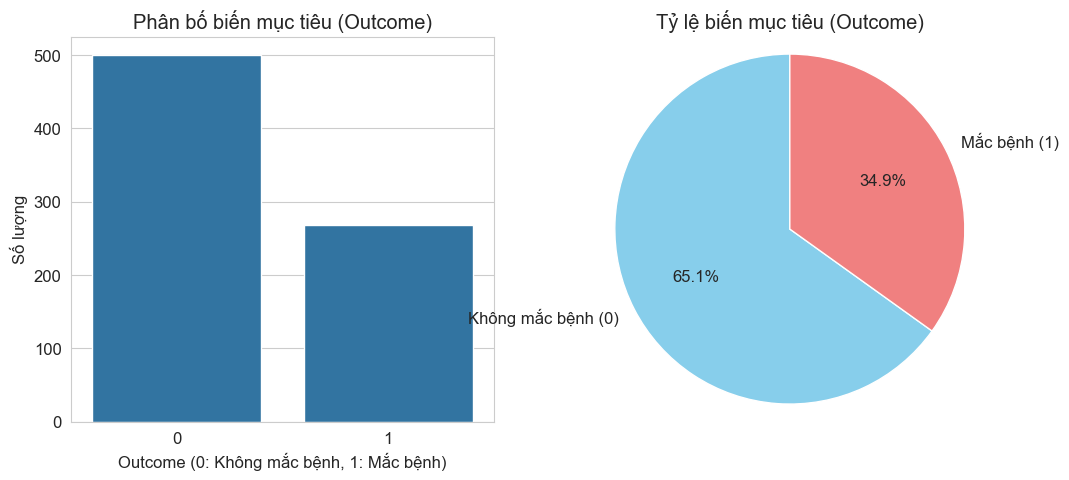

Số lượng từng lớp của biến Outcome:
Outcome
0    500
1    268
Name: count, dtype: int64


In [5]:
# Phân bố biến mục tiêu
outcome_counts = df['Outcome'].value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Outcome', data=df)
plt.title('Phân bố biến mục tiêu (Outcome)')
plt.xlabel('Outcome (0: Không mắc bệnh, 1: Mắc bệnh)')
plt.ylabel('Số lượng')

plt.subplot(1, 2, 2)
plt.pie(outcome_counts, labels=['Không mắc bệnh (0)', 'Mắc bệnh (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Tỷ lệ biến mục tiêu (Outcome)')
plt.axis('equal') # Đảm bảo biểu đồ tròn
plt.show()

print("Số lượng từng lớp của biến Outcome:")
print(outcome_counts)


Nhận xét:

- Dataset có sự mất cân bằng đáng kể giữa hai lớp của biến mục tiêu 'Outcome'.
- Khoảng 65.1% số người không mắc bệnh tiểu đường (Outcome = 0) và 34.9% mắc bệnh tiểu đường (Outcome = 1).
- Sự mất cân bằng này cần được xem xét khi huấn luyện mô hình để tránh việc mô hình thiên vị lớp chiếm đa số.


# IV.2 Kiểm tra dữ liệu thiếu và bất hợp lý

Mục tiêu: Xác định số lượng các giá trị 0 hoặc NaN trong các cột mà về mặt y tế không thể bằng 0 (Glucose, BloodPressure, SkinThickness, Insulin, BMI).



In [6]:
# Các cột có thể chứa giá trị 0 bất hợp lý
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Thống kê số lượng giá trị 0 trong các cột này
zero_counts = (df[cols_with_zero] == 0).sum()
print("Số lượng giá trị 0 trong các biến không hợp lý:")
print(zero_counts)

# Kiểm tra giá trị NaN (nếu có)
print("\nSố lượng giá trị NaN trong toàn bộ dữ liệu (trước khi xử lý 0):")
print(df.isnull().sum())


Số lượng giá trị 0 trong các biến không hợp lý:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Số lượng giá trị NaN trong toàn bộ dữ liệu (trước khi xử lý 0):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Nhận xét:

- **Glucose**: Có 5 giá trị 0, cần được coi là thiếu.
- **BloodPressure**: Có 35 giá trị 0, cần được coi là thiếu.
- **SkinThickness**: Có 227 giá trị 0, cần được coi là thiếu.
- **Insulin**: Có tới 374 giá trị 0, đây là số lượng đáng kể.
- **BMI**: Có 11 giá trị 0, cần được coi là thiếu.

Hiện tại không có giá trị NaN nào, nhưng các giá trị 0 này cần được chuyển thành NaN để xử lý thích hợp trong các bước tiếp theo. Đây là một vấn đề nghiêm trọng về chất lượng dữ liệu.


In [ ]:
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
zero_counts = (df[cols]==0).sum()
pd.DataFrame({'zero_count':zero_counts, 'zero_pct': zero_counts/len(df)*100})


Nhận xét:

- Cột `Insulin` có số lượng giá trị 0 nhiều nhất (374 giá trị, chiếm 48.7%).
- Tiếp theo là `SkinThickness` với 227 giá trị 0 (chiếm 29.5%).
- Các cột `BloodPressure`, `BMI`, `Glucose` cũng có giá trị 0 nhưng với tỷ lệ thấp hơn.

Các giá trị 0 trong các cột này cần được coi là dữ liệu thiếu và sẽ được xử lý trong các bước tiếp theo.


# IV.3 Phân tích phân phối các biến (Univariate Analysis)

Mục tiêu: Phân tích phân phối của từng biến riêng lẻ để hiểu rõ hơn về đặc điểm, xu hướng tập trung, độ lệch và sự hiện diện của các giá trị ngoại lai.



## IV.3.1 Pregnancies (histogram, boxplot, nhận xét)

Mục tiêu: Đánh giá phân phối số lần mang thai, xác định các khoảng giá trị phổ biến và phát hiện các trường hợp đặc biệt.



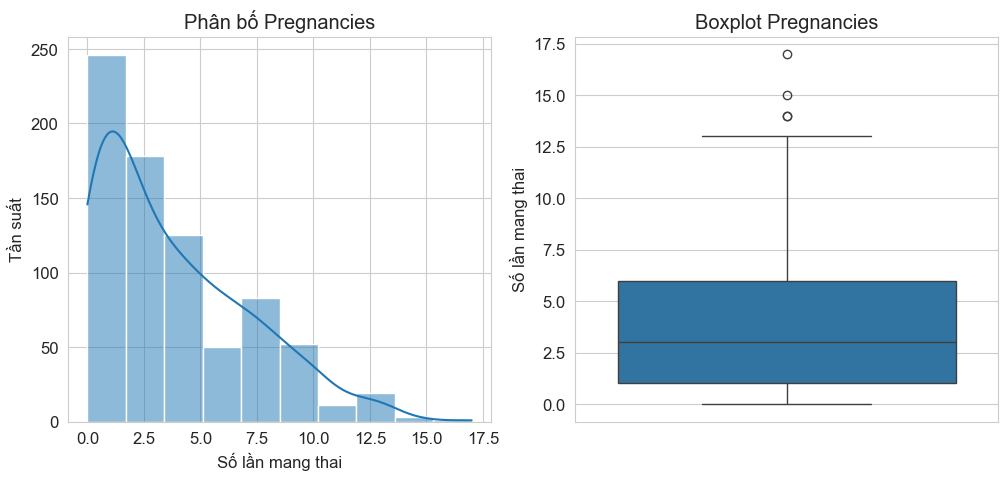

Thống kê mô tả Pregnancies:
count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64


In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Pregnancies'], kde=True, bins=10)
plt.title('Phân bố Pregnancies')
plt.xlabel('Số lần mang thai')
plt.ylabel('Tần suất')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Pregnancies'])
plt.title('Boxplot Pregnancies')
plt.ylabel('Số lần mang thai')
plt.show()

print("Thống kê mô tả Pregnancies:")
print(df['Pregnancies'].describe())


Nhận xét:

- Biến 'Pregnancies' có phân phối lệch phải (right-skewed), cho thấy đa số phụ nữ có ít lần mang thai hơn.
- Giá trị trung bình khoảng 3.8 lần.
- Có một số giá trị ngoại lai ở phía trên, với số lần mang thai lên đến 17.



## IV.3.2 Glucose

Mục tiêu: Hiểu phân bố nồng độ glucose trong huyết tương, xác định các khoảng giá trị điển hình và phát hiện các giá trị bất thường.



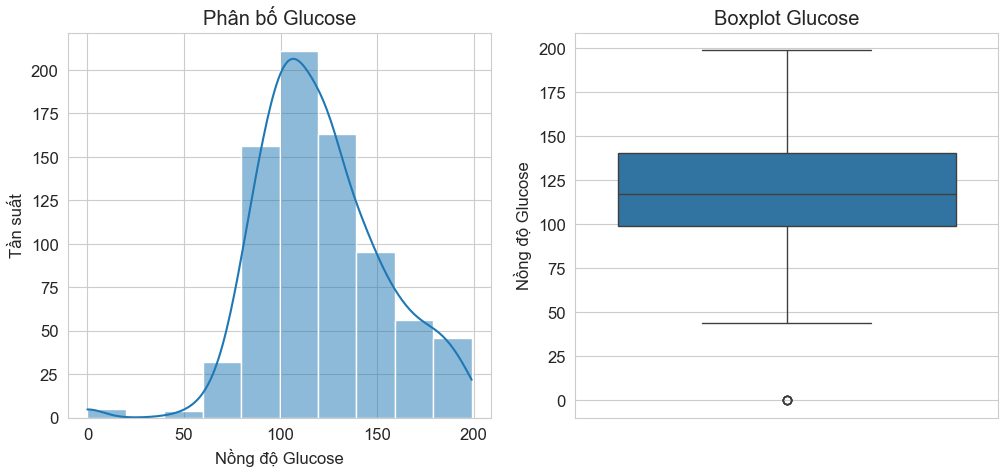

Thống kê mô tả Glucose:
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64


In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Glucose'], kde=True, bins=10)
plt.title('Phân bố Glucose')
plt.xlabel('Nồng độ Glucose')
plt.ylabel('Tần suất')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Glucose'])
plt.title('Boxplot Glucose')
plt.ylabel('Nồng độ Glucose')
plt.show()

print("Thống kê mô tả Glucose:")
print(df['Glucose'].describe())


Nhận xét:

- Phân bố 'Glucose' tương đối đối xứng nhưng có một số giá trị 0 (đã được đề cập ở IV.2) và một số giá trị ngoại lai cao.
- Giá trị trung bình khoảng 120.
- Có thể thấy các giá trị 0 đang làm sai lệch phân bố. Cần xử lý các giá trị 0 này trước khi phân tích sâu hơn.



## IV.3.3 BloodPressure

Mục tiêu: Kiểm tra phân bố huyết áp tâm trương, tìm hiểu các giá trị phổ biến và các giá trị bất thường.



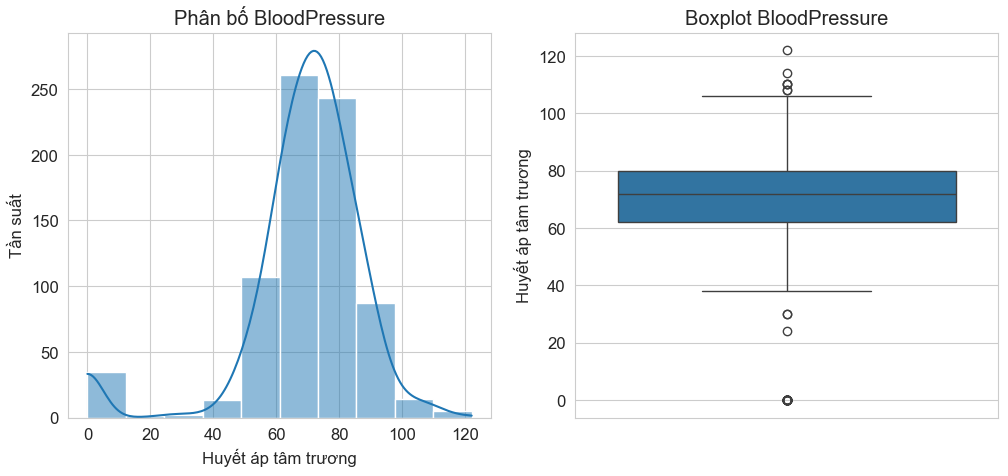

Thống kê mô tả BloodPressure:
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['BloodPressure'], kde=True, bins=10)
plt.title('Phân bố BloodPressure')
plt.xlabel('Huyết áp tâm trương')
plt.ylabel('Tần suất')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['BloodPressure'])
plt.title('Boxplot BloodPressure')
plt.ylabel('Huyết áp tâm trương')
plt.show()

print("Thống kê mô tả BloodPressure:")
print(df['BloodPressure'].describe())


Nhận xét:

- Phân bố 'BloodPressure' khá đối xứng nhưng cũng có các giá trị 0 và các giá trị ngoại lai cả ở mức thấp và cao.
- Giá trị trung bình khoảng 69.
- Các giá trị 0 cần được xử lý.



## IV.3.4 SkinThickness

Mục tiêu: Phân tích phân bố độ dày da, xác định các giá trị phổ biến và bất thường.



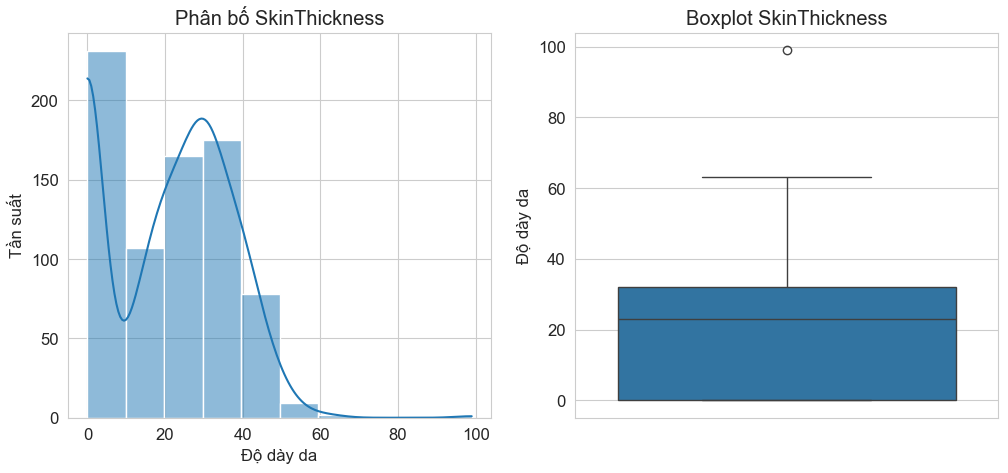

Thống kê mô tả SkinThickness:
count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64


In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['SkinThickness'], kde=True, bins=10)
plt.title('Phân bố SkinThickness')
plt.xlabel('Độ dày da')
plt.ylabel('Tần suất')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['SkinThickness'])
plt.title('Boxplot SkinThickness')
plt.ylabel('Độ dày da')
plt.show()

print("Thống kê mô tả SkinThickness:")
print(df['SkinThickness'].describe())


Nhận xét:

- Phân bố 'SkinThickness' lệch phải với nhiều giá trị 0.
- Giá trị trung bình khoảng 20.
- Nhiều giá trị 0 và một số ngoại lai cao.



## IV.3.5 Insulin

Mục tiêu: Nghiên cứu phân bố nồng độ insulin, đặc biệt chú ý đến số lượng lớn các giá trị 0.



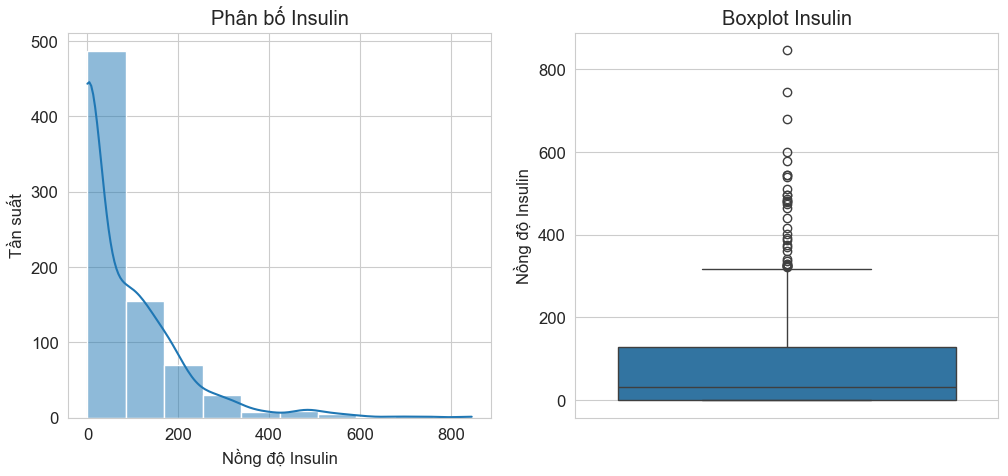

Thống kê mô tả Insulin:
count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64


In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Insulin'], kde=True, bins=10)
plt.title('Phân bố Insulin')
plt.xlabel('Nồng độ Insulin')
plt.ylabel('Tần suất')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Insulin'])
plt.title('Boxplot Insulin')
plt.ylabel('Nồng độ Insulin')
plt.show()

print("Thống kê mô tả Insulin:")
print(df['Insulin'].describe())


Nhận xét:

- Phân bố 'Insulin' bị lệch phải rất mạnh, với một lượng lớn giá trị 0.
- Có rất nhiều giá trị ngoại lai ở phía trên.
- Đây là biến có nhiều giá trị thiếu nhất (biểu diễn bằng 0) và cần được xử lý cẩn thận.



## IV.3.6 BMI

Mục tiêu: Đánh giá phân bố chỉ số BMI, xác định các giá trị phổ biến và các giá trị bất thường.



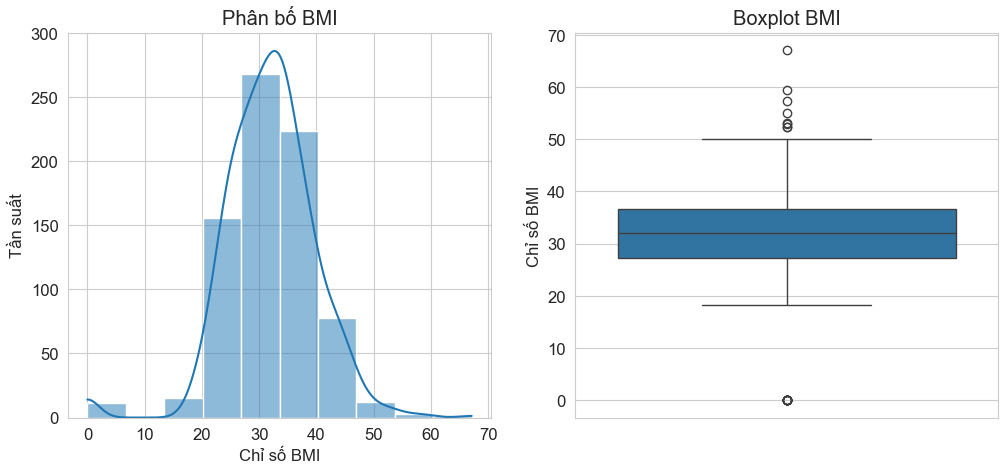

Thống kê mô tả BMI:
count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64


In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['BMI'], kde=True, bins=10)
plt.title('Phân bố BMI')
plt.xlabel('Chỉ số BMI')
plt.ylabel('Tần suất')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['BMI'])
plt.title('Boxplot BMI')
plt.ylabel('Chỉ số BMI')
plt.show()

print("Thống kê mô tả BMI:")
print(df['BMI'].describe())


Nhận xét:

- Phân bố 'BMI' khá đối xứng, nhưng có một số giá trị 0 và các giá trị ngoại lai ở cả hai phía.
- Giá trị trung bình khoảng 32.
- Các giá trị 0 cần được xử lý.



## IV.3.7 DiabetesPedigreeFunction

Mục tiêu: Kiểm tra phân bố hàm phả hệ tiểu đường, một chỉ số di truyền có thể ảnh hưởng đến nguy cơ mắc bệnh.



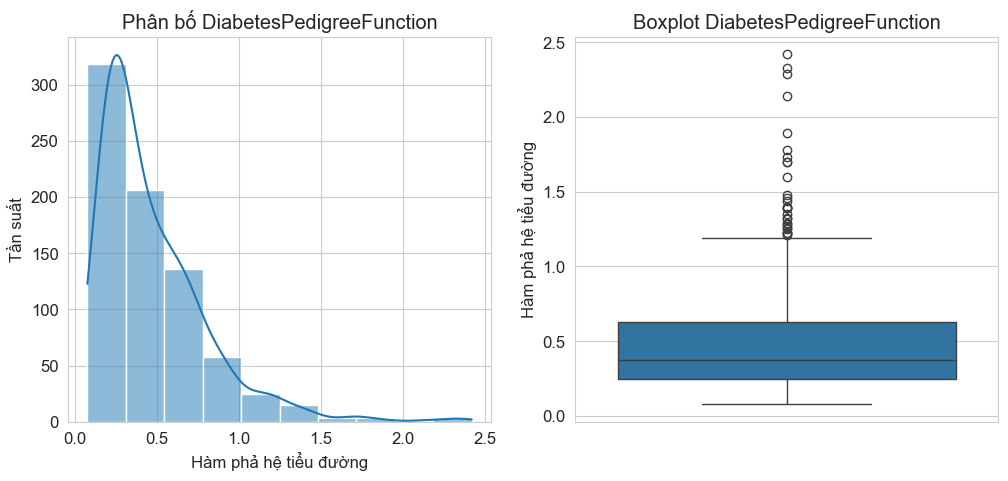

Thống kê mô tả DiabetesPedigreeFunction:
count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64


In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['DiabetesPedigreeFunction'], kde=True, bins=10)
plt.title('Phân bố DiabetesPedigreeFunction')
plt.xlabel('Hàm phả hệ tiểu đường')
plt.ylabel('Tần suất')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['DiabetesPedigreeFunction'])
plt.title('Boxplot DiabetesPedigreeFunction')
plt.ylabel('Hàm phả hệ tiểu đường')
plt.show()

print("Thống kê mô tả DiabetesPedigreeFunction:")
print(df['DiabetesPedigreeFunction'].describe())


Nhận xét:

- Phân bố 'DiabetesPedigreeFunction' lệch phải mạnh, với đa số giá trị tập trung ở mức thấp.
- Có nhiều giá trị ngoại lai ở phía trên.



## IV.3.8 Age

Mục tiêu: Phân tích phân bố tuổi của các bệnh nhân trong dataset.



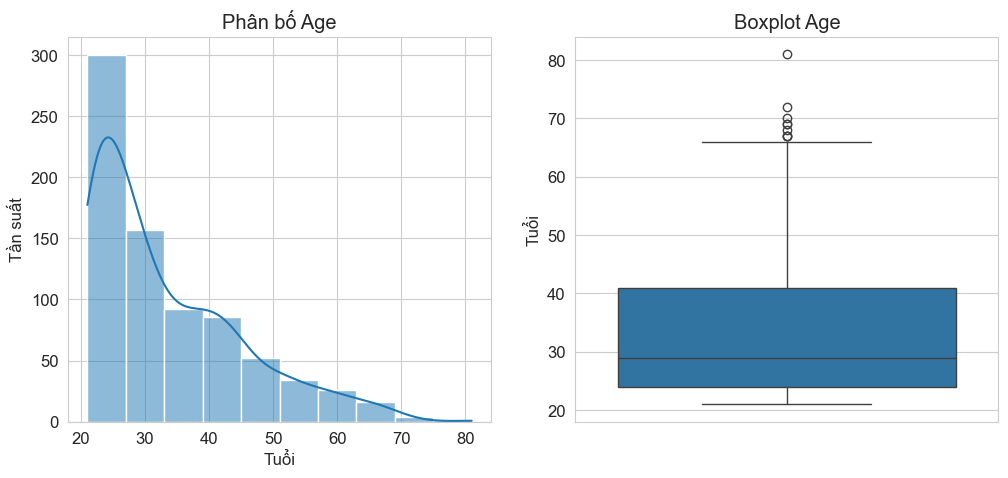

Thống kê mô tả Age:
count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64


In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=10)
plt.title('Phân bố Age')
plt.xlabel('Tuổi')
plt.ylabel('Tần suất')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Age'])
plt.title('Boxplot Age')
plt.ylabel('Tuổi')
plt.show()

print("Thống kê mô tả Age:")
print(df['Age'].describe())


Nhận xét:

- Phân bố 'Age' lệch phải nhẹ, cho thấy có nhiều người trẻ tuổi hơn trong dataset.
- Có một số giá trị ngoại lai ở phía trên, với tuổi cao nhất là 81.



# IV.4 So sánh nhóm mắc và không mắc (Bivariate Analysis)

Mục tiêu: So sánh các đặc điểm của những người mắc và không mắc bệnh tiểu đường để tìm ra các biến có ảnh hưởng lớn đến 'Outcome'.



## IV.4.1 Thống kê mô tả phân tách theo Outcome (groupby + agg)

Mục tiêu: Cung cấp các thống kê mô tả (trung bình, độ lệch chuẩn, min, max) cho từng biến, nhưng phân tách theo giá trị của biến 'Outcome' (0: không mắc bệnh, 1: mắc bệnh). Điều này giúp so sánh trực tiếp các đặc điểm giữa hai nhóm.



In [15]:
print("Thống kê mô tả phân tách theo Outcome:")
print(df.groupby("Outcome").describe())


Thống kê mô tả phân tách theo Outcome:
        Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        109.980000  ...                  0.56175  2.329  500.0  31.190000   
1        141.257463  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  

Nhận xét:

- **Pregnancies**: Nhóm mắc tiểu đường có số lần mang thai trung bình cao hơn (khoảng 4.87) so với nhóm không mắc (khoảng 3.30).
- **Glucose**: Mức glucose trung bình ở người mắc tiểu đường cao hơn đáng kể (khoảng 141.26) so với người không mắc (khoảng 109.98).
- **BloodPressure**: Huyết áp trung bình ở người mắc tiểu đường cao hơn một chút (khoảng 70.82) so với người không mắc (khoảng 68.18).
- **SkinThickness**: Độ dày da trung bình ở người mắc tiểu đường cao hơn một chút (khoảng 22.16) so với người không mắc (khoảng 19.66).
- **Insulin**: Mức insulin trung bình ở người mắc tiểu đường cao hơn (khoảng 100.33) so với người không mắc (khoảng 68.79), nhưng cả hai nhóm đều có giá trị min là 0, cho thấy vấn đề giá trị thiếu vẫn tồn tại.
- **BMI**: BMI trung bình ở người mắc tiểu đường cao hơn đáng kể (khoảng 35.14) so với người không mắc (khoảng 30.30).
- **DiabetesPedigreeFunction**: Giá trị trung bình cao hơn ở người mắc tiểu đường (khoảng 0.55) so với người không mắc (khoảng 0.43).
- **Age**: Tuổi trung bình ở người mắc tiểu đường cao hơn (khoảng 37.07) so với người không mắc (khoảng 31.19).

Tổng quan, các biến 'Glucose', 'BMI', 'Age', 'Pregnancies' và 'Insulin' cho thấy sự khác biệt rõ rệt giữa hai nhóm, gợi ý chúng là những yếu tố quan trọng trong việc dự đoán bệnh tiểu đường.

## IV.4.2. So sánh phân phối bằng Violin Plot

**Mục đích:**

Sử dụng biểu đồ Violin để so sánh trực quan sự phân bố của các thuộc tính quan trọng giữa hai nhóm: nhóm mắc bệnh tiểu đường (Outcome=1) và nhóm không mắc bệnh (Outcome=0). Biểu đồ này kết hợp boxplot và biểu đồ mật độ, cho phép chúng ta thấy được:
- **Phân bố mật độ:** Độ rộng của violin cho biết mật độ dữ liệu tại một giá trị nhất định.
- **Các điểm thống kê:** Tương tự boxplot, nó hiển thị trung vị, khoảng tứ phân vị và các điểm ngoại lai.

Chúng ta sẽ tập trung vào 5 biến có ảnh hưởng lớn nhất đã được nhận định ở các bước trước: `Glucose`, `BMI`, `Age`, `Insulin`, và `BloodPressure`.

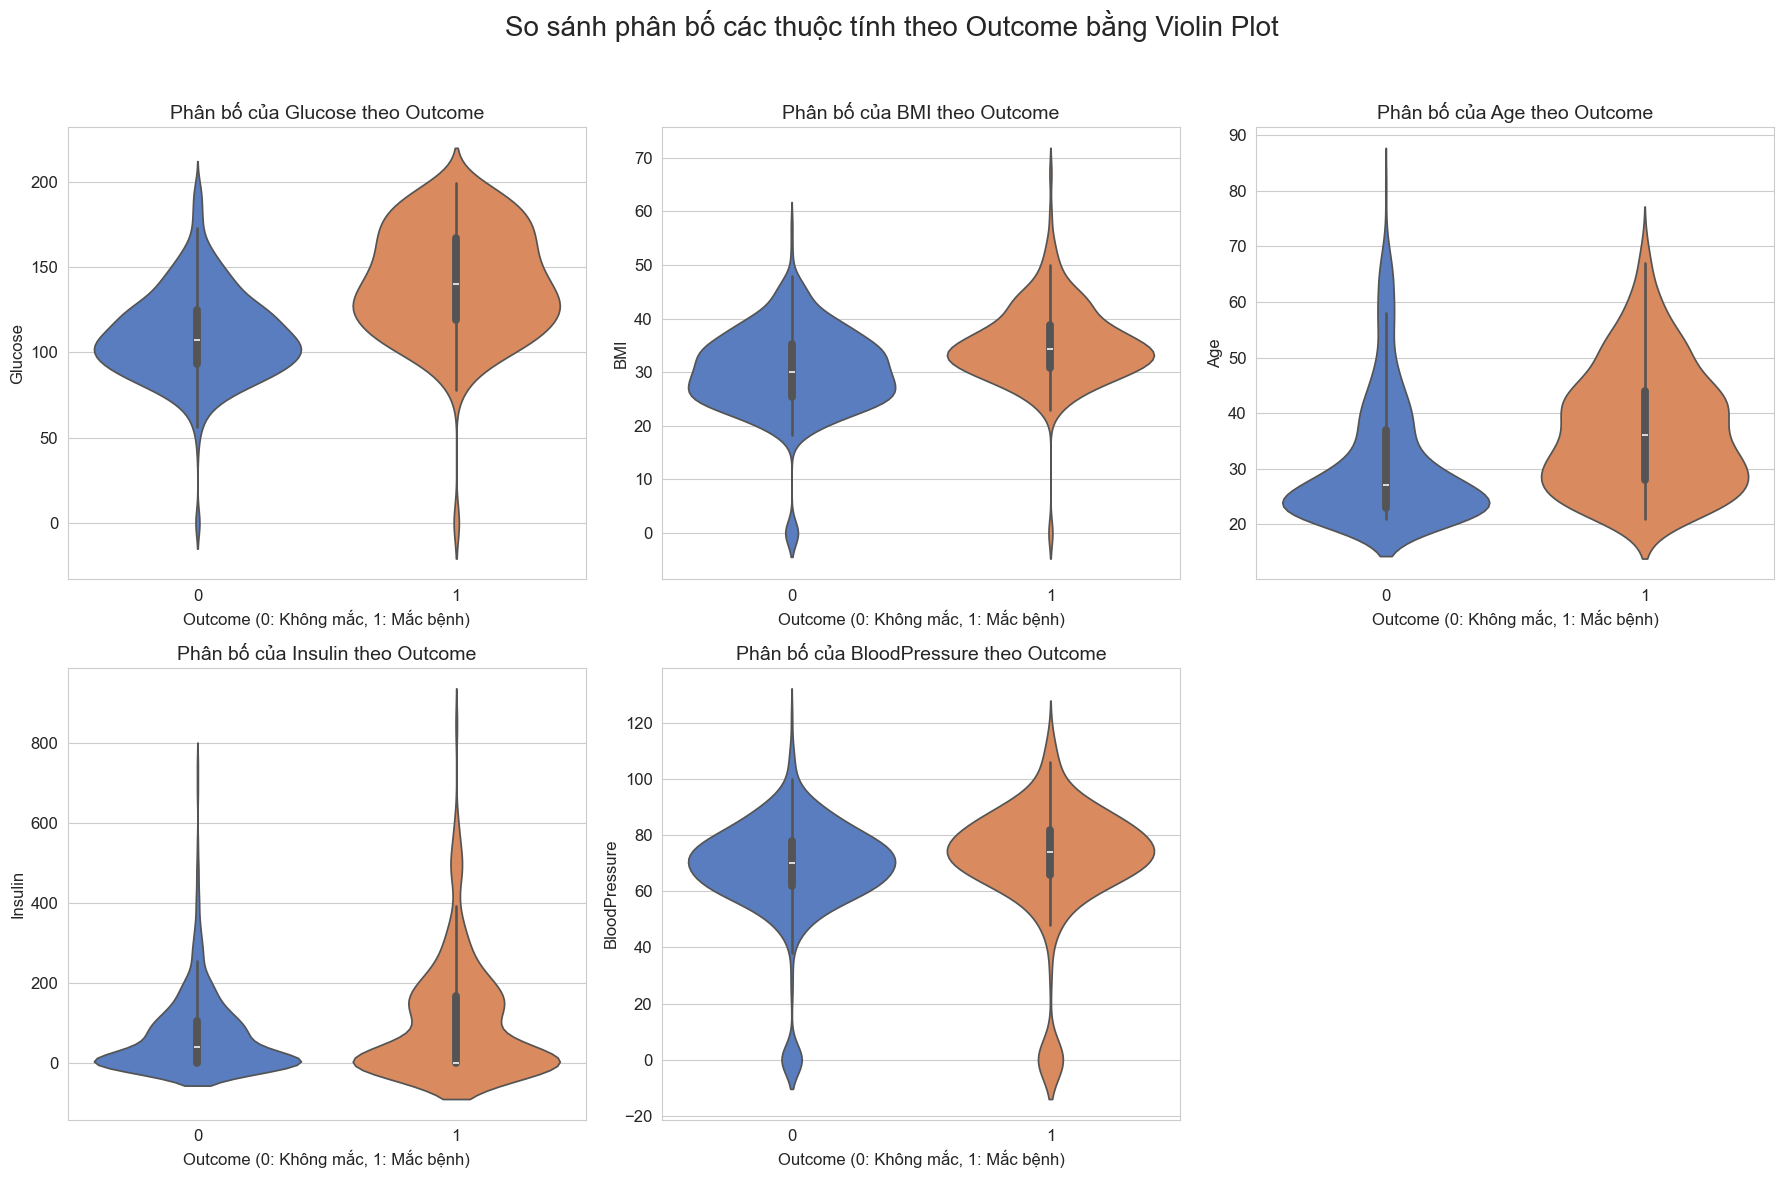

In [ ]:
# Import các thư viện cần thiết
import seaborn as sns
import matplotlib.pyplot as plt

# Chọn ra 5 thuộc tính quan trọng để vẽ
features = ['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure']

# Thiết lập kích thước cho toàn bộ hình vẽ
plt.figure(figsize=(18, 12))
plt.suptitle('So sánh phân bố các thuộc tính theo Outcome bằng Violin Plot', fontsize=20)

# Dùng vòng lặp để vẽ 5 biểu đồ con (subplot)
for i, feature in enumerate(features):
    # Tạo một subplot trong lưới 2x3 tại vị trí i+1
    plt.subplot(2, 3, i + 1)
    
    # --- DÒNG CODE ĐÃ ĐƯỢC CẬP NHẬT ---
    # Gán 'Outcome' cho cả x và hue, sau đó tắt chú giải (legend)
    sns.violinplot(x='Outcome', y=feature, data=df, hue='Outcome', palette='muted', legend=False)
    
    # Đặt tiêu đề cho từng subplot
    plt.title(f'Phân bố của {feature} theo Outcome', fontsize=14)
    plt.xlabel('Outcome (0: Không mắc, 1: Mắc bệnh)', fontsize=12)
    plt.ylabel(feature, fontsize=12)

# Tự động điều chỉnh khoảng cách giữa các subplot cho đẹp mắt
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Điều chỉnh để tiêu đề chung không bị đè

# Hiển thị biểu đồ
plt.show()

### **Nhận xét từ biểu đồ Violin:**

Từ các biểu đồ trên, có thể rút ra những nhận xét quan trọng sau:

* **Glucose (Nồng độ glucose):** Có sự khác biệt rất rõ ràng. Phân bố của nhóm mắc bệnh (Outcome=1) dịch chuyển hoàn toàn về phía các giá trị cao hơn so với nhóm không mắc bệnh. Mật độ glucose của nhóm 1 tập trung chủ yếu trong khoảng 120-180, trong khi nhóm 0 tập trung ở khoảng 90-110. Đây là dấu hiệu dự báo mạnh mẽ nhất.
* **BMI (Chỉ số khối cơ thể):** Nhóm mắc bệnh có xu hướng có chỉ số BMI cao hơn. Mặc dù có sự chồng chéo, nhưng phần thân của violin plot cho nhóm 1 rõ ràng cao hơn nhóm 0.
* **Age (Tuổi):** Phân bố tuổi của nhóm mắc bệnh cũng có xu hướng cao hơn. Điều này phù hợp với thực tế rằng nguy cơ mắc bệnh tiểu đường tuýp 2 tăng theo độ tuổi.
* **Insulin:** Nhóm mắc bệnh có sự phân tán nồng độ Insulin rất rộng và có nhiều giá trị ngoại lai rất cao, cho thấy tình trạng kháng insulin hoặc rối loạn tiết insulin. Trong khi đó, nhóm không mắc bệnh có nồng độ insulin tập trung ở mức thấp và ổn định hơn nhiều.
* **BloodPressure (Huyết áp):** Sự khác biệt về huyết áp giữa hai nhóm không rõ rệt như các biến khác, phân bố của hai nhóm có độ chồng chéo cao. Tuy nhiên, trung vị của nhóm mắc bệnh vẫn có phần nhỉnh hơn một chút.

**Tổng kết:** `Glucose`, `BMI`, `Age`, và `Insulin` là những yếu tố cho thấy sự khác biệt đáng kể giữa hai nhóm bệnh nhân, và có khả năng là những biến quan trọng để xây dựng mô hình dự đoán.

## IV.4.3 Kiểm định thống kê Mann–Whitney U test

Mục tiêu: Thực hiện kiểm định phi tham số Mann–Whitney U test để so sánh hai nhóm độc lập (Outcome=0 và Outcome=1) cho từng biến số. Kiểm định này giúp xác định xem có sự khác biệt có ý nghĩa thống kê về vị trí phân phối giữa hai nhóm hay không, đặc biệt hữu ích khi dữ liệu không tuân theo phân phối chuẩn.


In [ ]:
from scipy.stats import mannwhitneyu

all_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

print("Kết quả kiểm định Mann–Whitney U test:")
for c in all_cols:
    x0 = df.loc[df.Outcome==0, c].dropna()
    x1 = df.loc[df.Outcome==1, c].dropna()
    stat, p = mannwhitneyu(x0, x1)
    print(f"{c}: p-value = {p:.4f}")


Nhận xét:

Với ngưỡng ý nghĩa thống kê \( \alpha = 0.05 \):

- Các biến có p-value nhỏ hơn 0.05 (`Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`) đều cho thấy sự khác biệt có ý nghĩa thống kê giữa nhóm mắc và không mắc bệnh tiểu đường (Outcome=0 và Outcome=1).
- Điều này củng cố thêm rằng tất cả các biến độc lập này đều có khả năng đóng góp vào việc phân biệt hai nhóm, và sự khác biệt về phân phối giữa hai nhóm là đáng tin cậy về mặt thống kê.


# IV.5. Phân tích đa biến và tương quan (Multivariate Analysis)

Phân tích đa biến giúp chúng ta khám phá mối quan hệ đồng thời giữa nhiều biến. Trong phần này, chúng ta sẽ sử dụng hai công cụ trực quan hóa mạnh mẽ là Heatmap (Bản đồ nhiệt) và Pairplot để xác định các mối tương quan.

## IV.5.1. Heatmap tương quan giữa các biến

**Mục đích:**

Heatmap là cách biểu diễn đồ họa của ma trận tương quan. Mỗi ô trong bản đồ nhiệt hiển thị hệ số tương quan giữa hai biến.
- **Màu sắc:** Màu càng nóng (ví dụ: đỏ tươi) cho thấy tương quan dương càng mạnh (khi biến này tăng, biến kia cũng có xu hướng tăng). Màu càng lạnh (ví dụ: xanh đậm) cho thấy tương quan âm càng mạnh (khi biến này tăng, biến kia có xu hướng giảm).
- **Giá trị:** Các số trong ô là hệ số tương quan Pearson, dao động từ -1 đến +1.

Chúng ta sẽ sử dụng heatmap để nhanh chóng xác định các cặp biến có quan hệ tuyến tính mạnh mẽ với nhau, đặc biệt là mối quan hệ giữa các biến độc lập và biến mục tiêu `Outcome`.

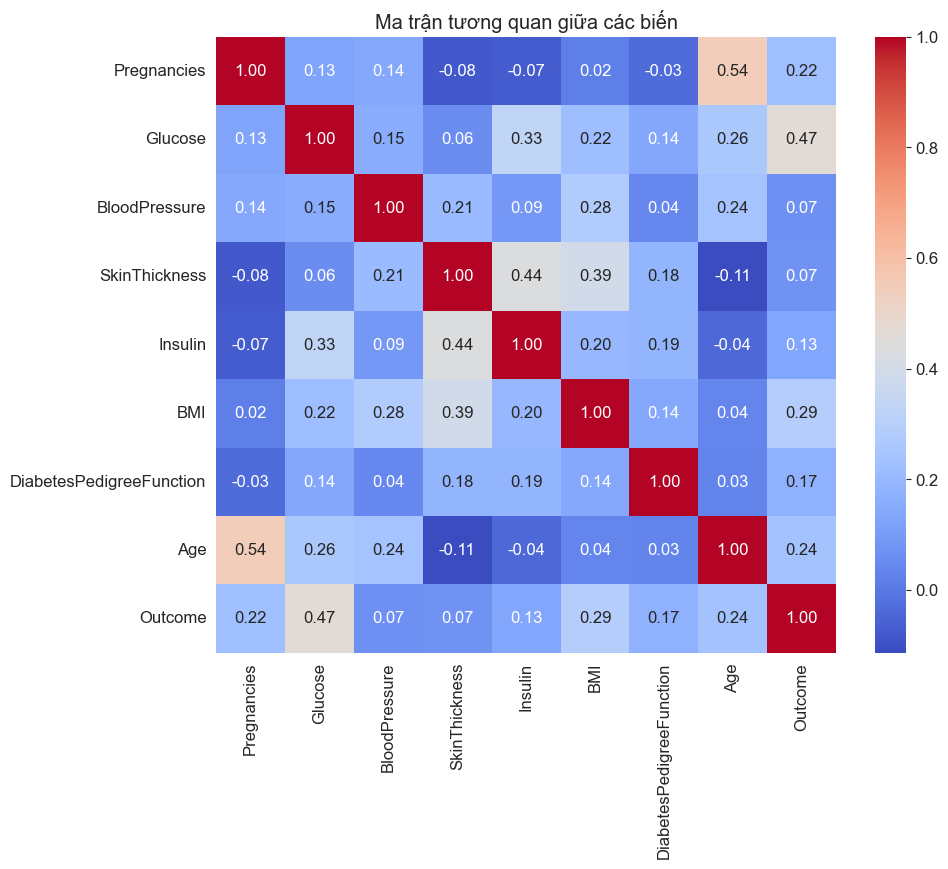

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến')
plt.show()


Nhận xét:

- **Outcome Correlation:**
    - 'Glucose' có tương quan dương mạnh nhất với 'Outcome' (0.47).
    - 'BMI' (0.29), 'Age' (0.24) và 'Pregnancies' (0.22) cũng có tương quan dương đáng kể với 'Outcome'.
    - 'Insulin' và 'SkinThickness' có tương quan yếu hơn với 'Outcome'.
- **Inter-feature Correlation:**
    - 'Pregnancies' và 'Age' có tương quan dương khá (0.54).
    - 'SkinThickness' và 'Insulin' có tương quan mạnh (0.44), điều này có thể hiểu được vì cả hai đều liên quan đến chuyển hóa.
    - 'Glucose' và 'Insulin' có tương quan dương (0.33).
    - Các mối tương quan cao giữa các biến độc lập có thể gây ra vấn đề đa cộng tuyến (multicollinearity) khi xây dựng mô hình hồi quy.



## IV.5.2 Pairplot (scatter matrix)

Mục tiêu: Trực quan hóa mối quan hệ giữa tất cả các cặp biến số (dạng scatter plot) và phân phối của từng biến (dạng histogram/kde) trên cùng một lưới biểu đồ. Điều này giúp phát hiện các mối quan hệ phi tuyến tính, cụm dữ liệu hoặc các mẫu tiềm ẩn khác.



<Figure size 1500x1500 with 0 Axes>

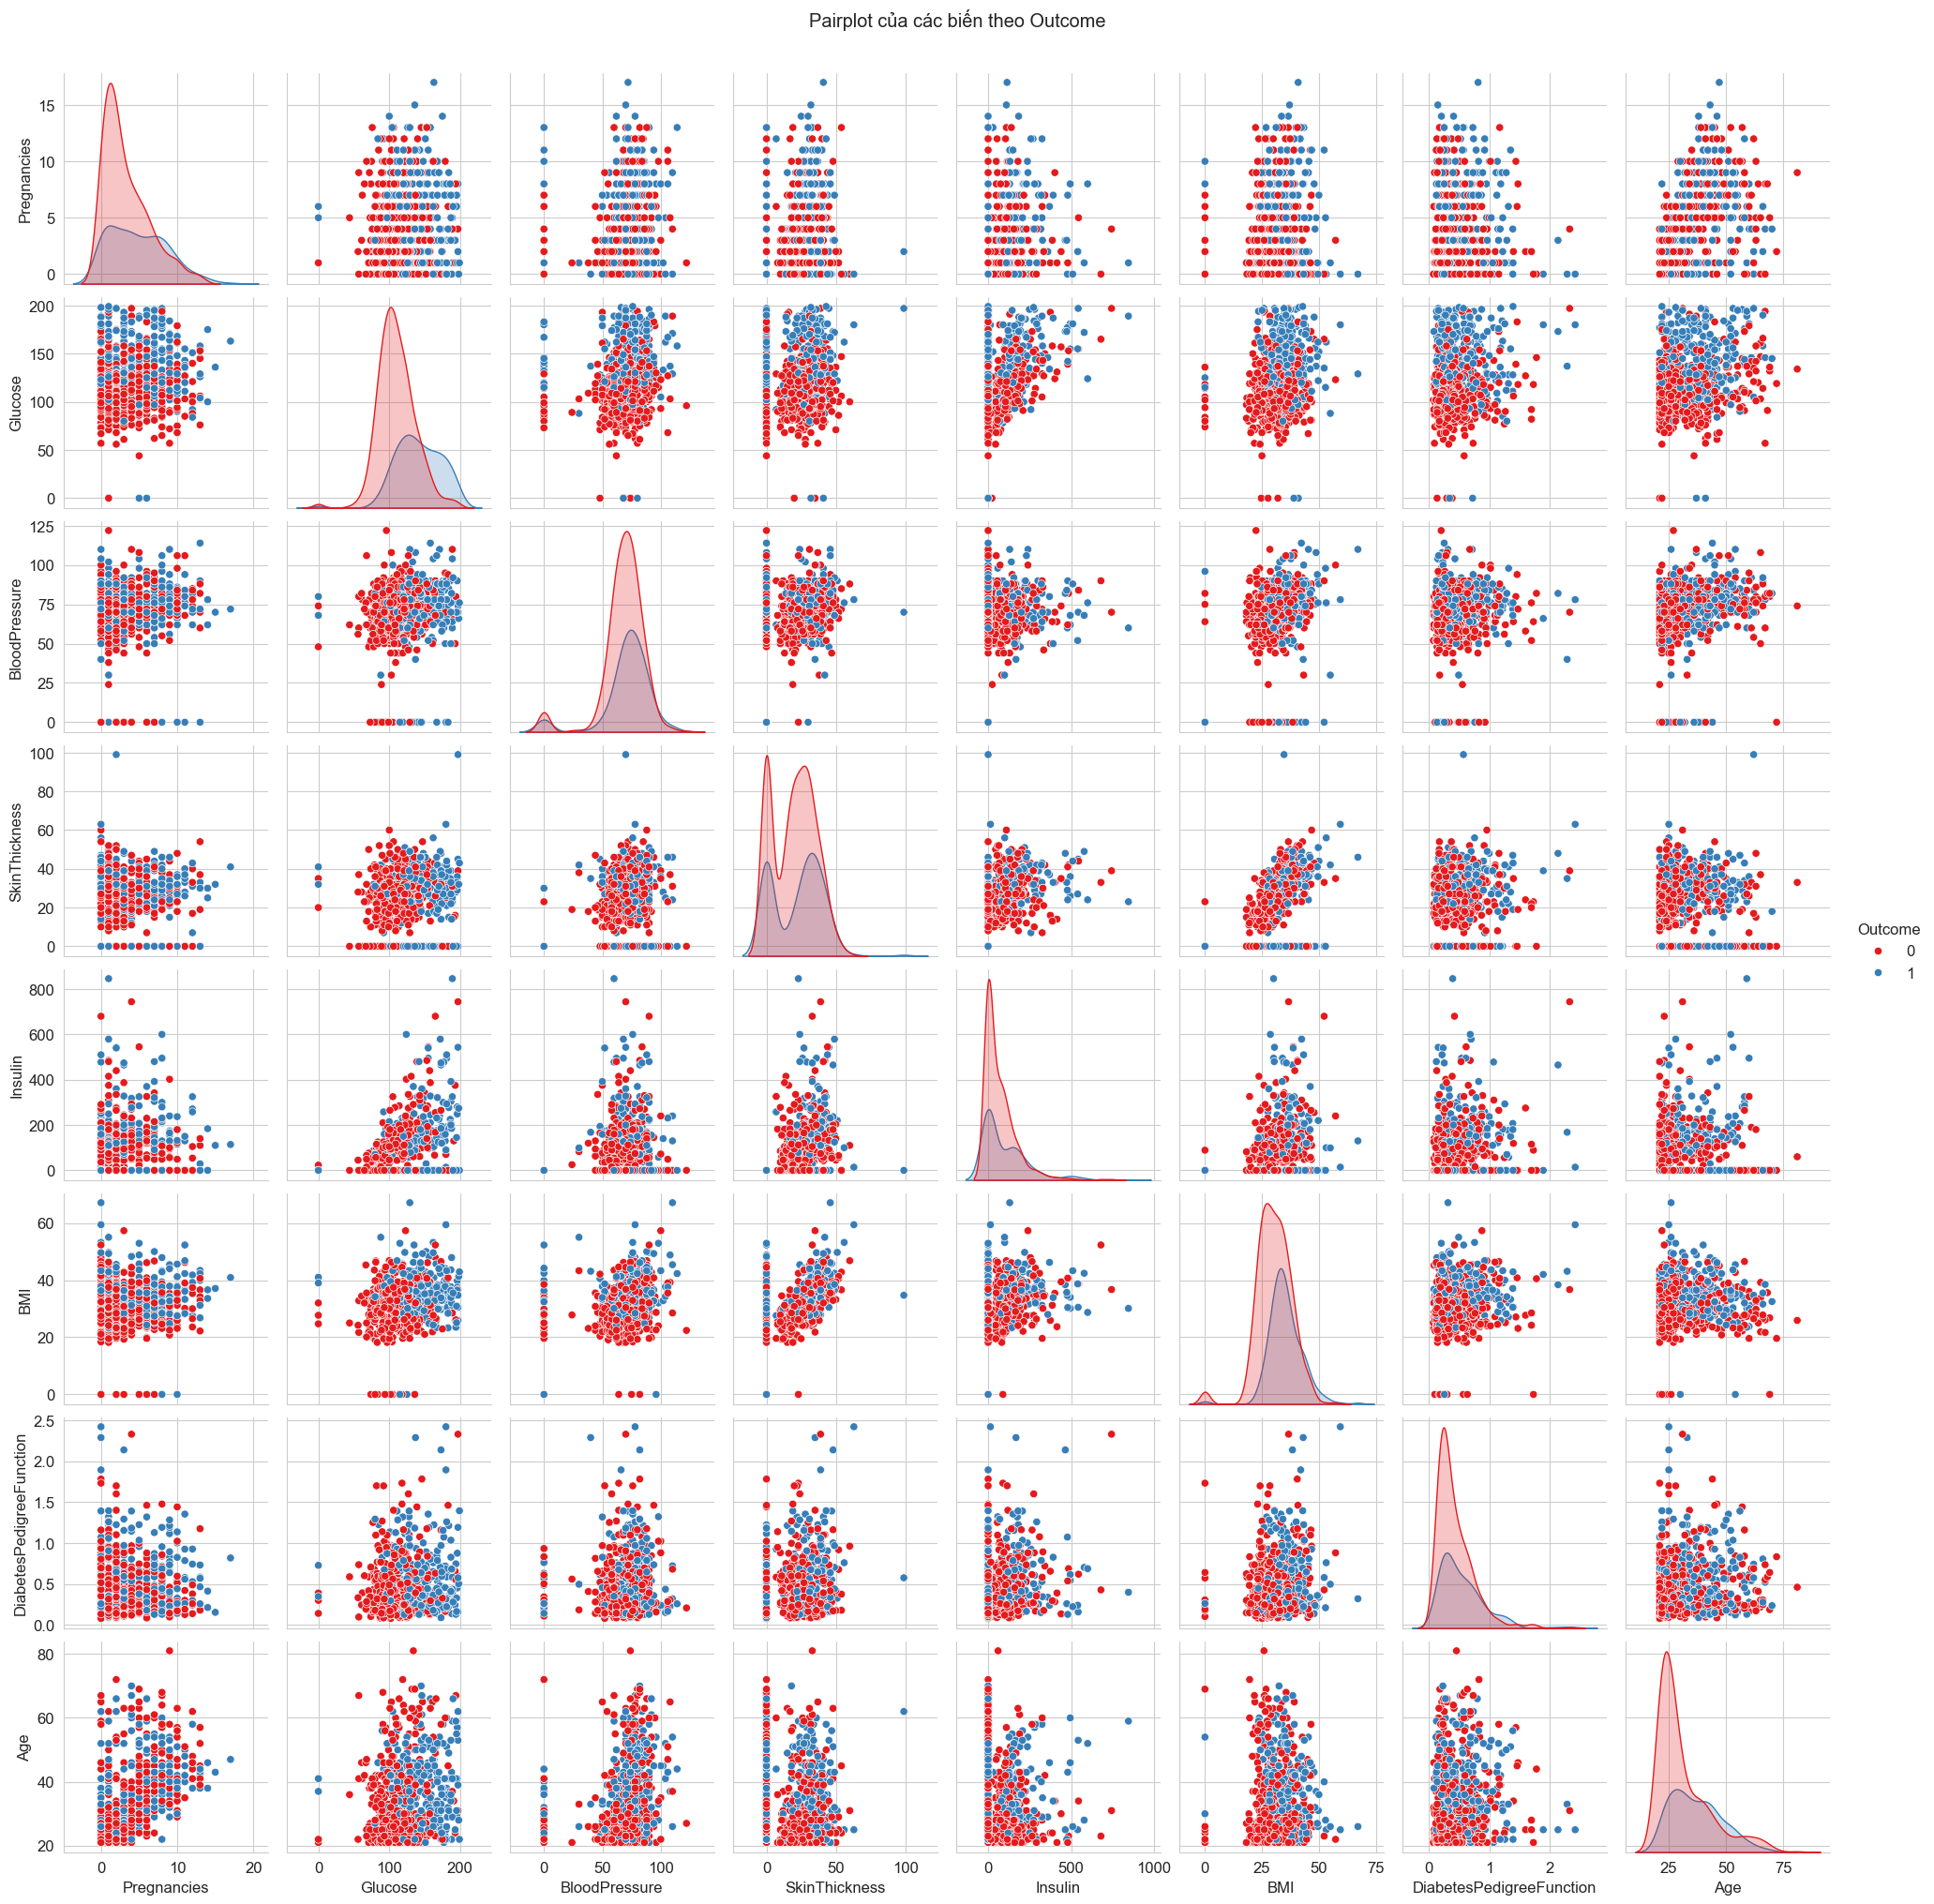

In [18]:
plt.figure(figsize=(15, 15)) # Thêm dòng này để điều chỉnh kích thước
sns.pairplot(df, hue='Outcome', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot của các biến theo Outcome', y=1.02) # Đặt tiêu đề chung cao hơn
plt.show()


Nhận xét:

- Biểu đồ pairplot củng cố những gì đã thấy từ heatmap và violin plot.
- **Glucose vs Outcome**: Rõ ràng có sự tách biệt tốt giữa hai nhóm (0 và 1) khi nồng độ Glucose tăng.
- **BMI vs Outcome**: Tương tự, BMI cao hơn có xu hướng liên quan đến Outcome = 1.
- **Age vs Outcome**: Nhóm Outcome = 1 có xu hướng già hơn.
- **Insulin vs Outcome**: Vấn đề giá trị 0 lại xuất hiện rõ rệt, đặc biệt ở nhóm Outcome = 0. Khi insulin > 0, nhóm Outcome = 1 có xu hướng insulin cao hơn.
- Các biểu đồ phân phối (diagonal plots) cho thấy lại các phân phối lệch và sự hiện diện của giá trị 0 ở một số biến.
- Mối quan hệ giữa một số cặp biến độc lập dường như tuyến tính (ví dụ: Age và Pregnancies), trong khi những mối quan hệ khác phức tạp hơn.



## IV.5.3 Nhận xét tổng quan

Tổng hợp các phát hiện từ phân tích đa biến và tương quan:

- **Tương quan mạnh**: 'Glucose' và 'Outcome' có mối quan hệ mạnh nhất (tương quan dương 0.47), cho thấy mức đường huyết là yếu tố dự đoán bệnh tiểu đường quan trọng nhất. 'BMI', 'Age' và 'Pregnancies' cũng có mối quan hệ tích cực đáng kể với 'Outcome'.
- **Tương quan yếu**: 'BloodPressure' có tương quan tương đối yếu với 'Outcome' (khoảng 0.17), cho thấy huyết áp ít liên quan trực tiếp đến việc mắc bệnh tiểu đường trong bộ dữ liệu này so với các biến khác.
- **Đa cộng tuyến tiềm năng**: Tồn tại các mối tương quan vừa phải giữa một số biến độc lập (ví dụ: 'Pregnancies' và 'Age' 0.54, 'SkinThickness' và 'Insulin' 0.44), cần lưu ý khi xây dựng mô hình để tránh vấn đề đa cộng tuyến.
- **Vấn đề dữ liệu**: Các giá trị 0 bất hợp lý trong 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' vẫn là một vấn đề nổi bật, làm sai lệch các phân tích và cần được xử lý triệt để trước khi mô hình hóa.
- **Mất cân bằng lớp**: Sự mất cân bằng lớp của biến mục tiêu 'Outcome' cần được quan tâm trong quá trình huấn luyện mô hình.

# IV.6 Outliers (Giá trị ngoại lai)

Mục tiêu: Xác định và phân tích các giá trị ngoại lai trong từng biến số. Giá trị ngoại lai có thể ảnh hưởng lớn đến phân tích thống kê và hiệu suất mô hình, do đó cần được nhận diện và xử lý.



## IV.6.2 Xử lý Outliers bằng IQR Capping

Mục tiêu: Xử lý các giá trị ngoại lai bằng phương pháp IQR capping (winsorize). Phương pháp này giúp giới hạn các giá trị ngoại lai ở ngưỡng trên và dưới, giảm thiểu ảnh hưởng của chúng đến mô hình mà không loại bỏ dữ liệu.


In [ ]:
cols_for_outliers = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

for c in cols_for_outliers:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[c] = df[c].clip(lower, upper)

print("Đã xử lý outliers bằng IQR capping.")


## IV.6.3 Boxplot sau khi xử lý Outliers

Mục tiêu: Hiển thị lại biểu đồ boxplot cho các biến sau khi đã áp dụng phương pháp IQR capping để xử lý outliers. Việc này giúp trực quan hóa hiệu quả của phương pháp xử lý và xác nhận rằng các giá trị ngoại lai đã được giới hạn trong phạm vi hợp lý.


In [ ]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(15, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot của {feature} sau khi xử lý Outliers')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


Nhận xét:

- Sau khi áp dụng IQR capping, các giá trị ngoại lai ở cả phía trên và phía dưới của các biến đã được giới hạn lại.
- Điều này được thể hiện rõ qua việc các "chấm" biểu thị outliers trên boxplot đã giảm đáng kể hoặc biến mất.
- Việc xử lý outliers giúp làm cho phân phối dữ liệu trở nên ít biến động hơn, và sẽ cải thiện độ bền vững của mô hình học máy đối với các giá trị cực đoan.


## IV.6.1 Boxplot để phát hiện ngoại lai cho từng biến chính

Mục tiêu: Sử dụng biểu đồ boxplot để trực quan hóa sự phân bố và phát hiện các giá trị ngoại lai cho từng biến độc lập quan trọng.



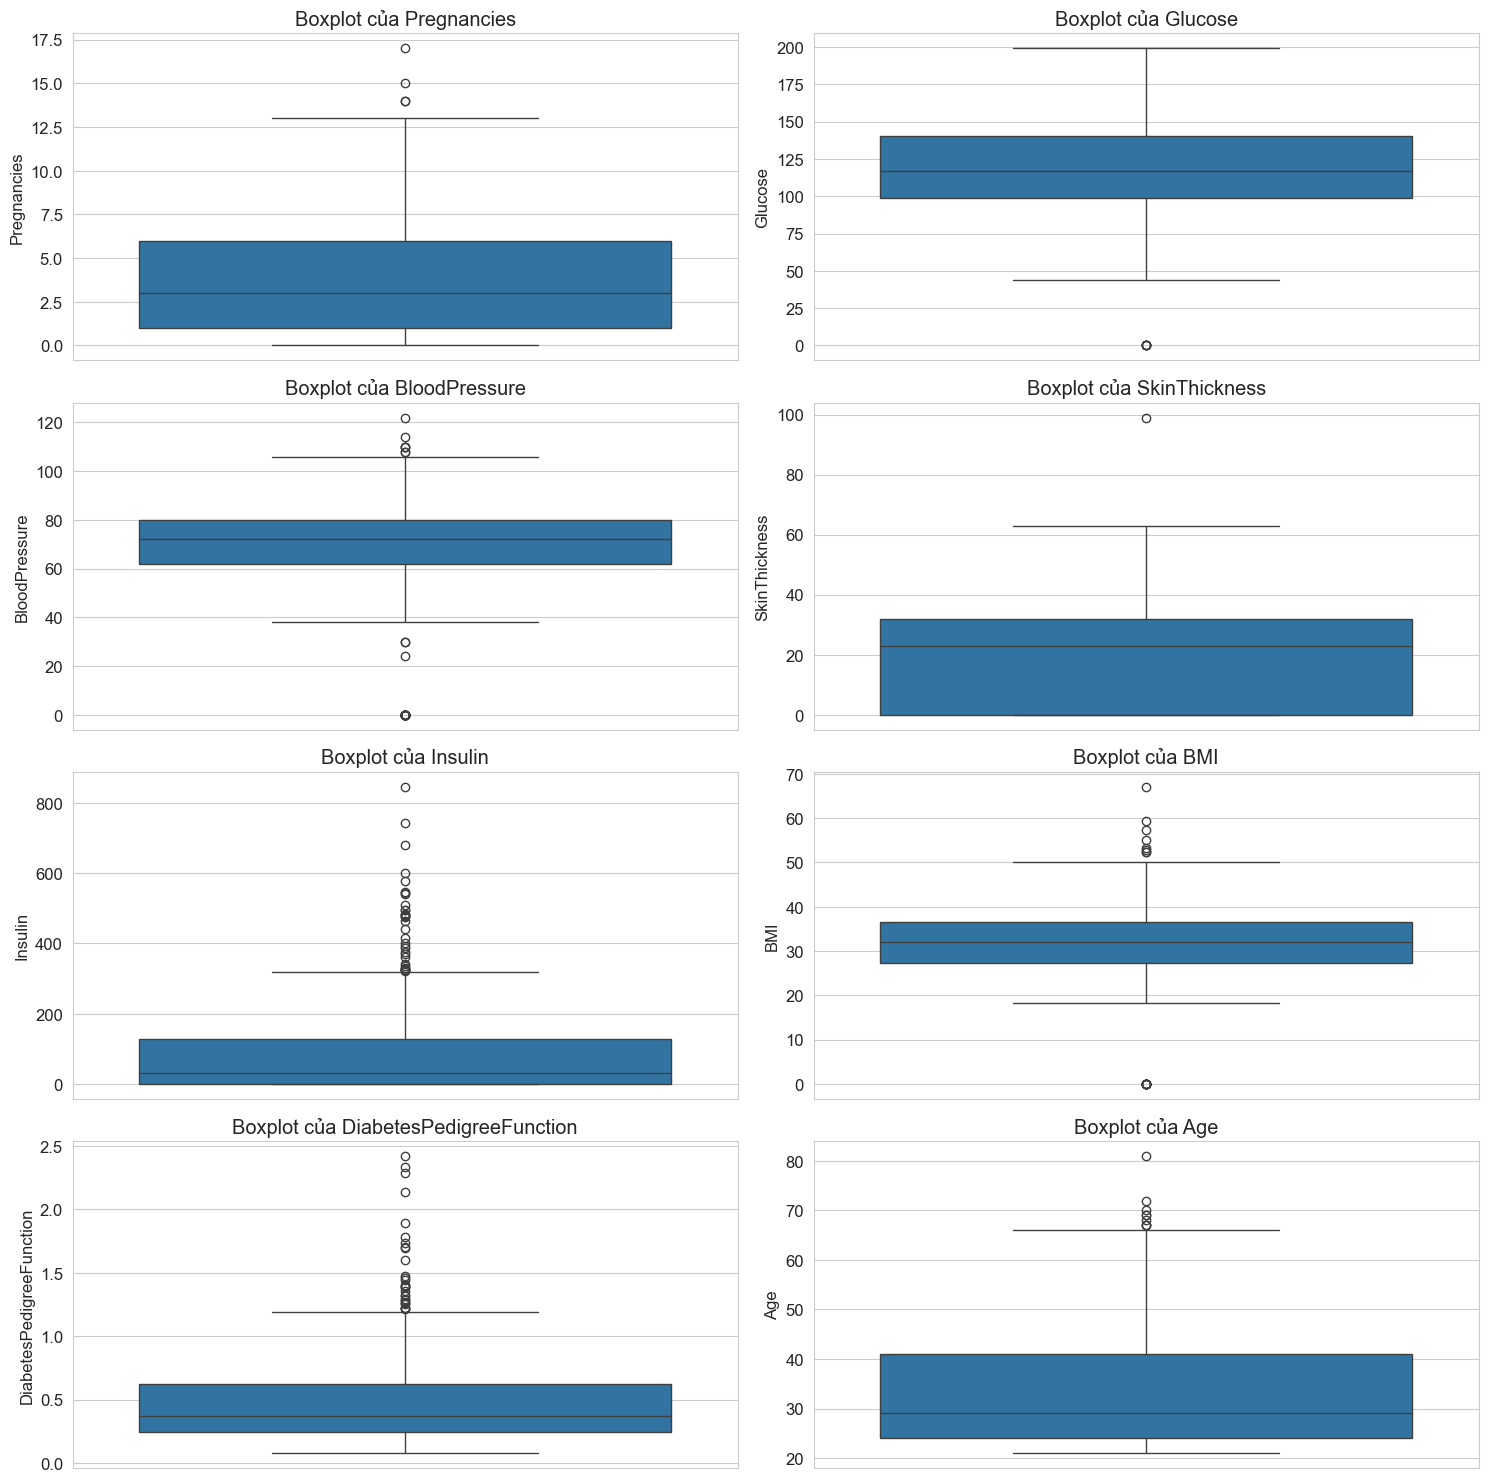

In [19]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(15, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot của {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


### Nhận xét các biến có outliers nhiều

Từ các boxplot trên, chúng ta có thể thấy rõ các giá trị ngoại lai ở nhiều biến:

- **Pregnancies**: Có nhiều giá trị ngoại lai ở phía trên (số lần mang thai cao).
- **Glucose**: Có một số giá trị ngoại lai rất cao, ngoài ra còn có các giá trị 0 bất thường.
- **BloodPressure**: Có giá trị 0 bất thường và một số giá trị ngoại lai ở cả phía thấp và cao.
- **SkinThickness**: Nhiều giá trị 0 và một số giá trị ngoại lai cao.
- **Insulin**: Biến này có rất nhiều giá trị 0 và nhiều giá trị ngoại lai rất cao, đây là biến có vấn đề ngoại lai nghiêm trọng nhất.
- **BMI**: Có giá trị 0 bất thường và một số giá trị ngoại lai cao.
- **DiabetesPedigreeFunction**: Có nhiều giá trị ngoại lai ở phía trên.
- **Age**: Có một số giá trị ngoại lai ở phía trên (tuổi cao).

Kết luận: Hầu hết các biến đều có giá trị ngoại lai. Điều này đòi hỏi phải có chiến lược xử lý ngoại lai phù hợp trong giai đoạn tiền xử lý dữ liệu. Đặc biệt các giá trị 0 không hợp lý cần được coi là giá trị thiếu và được xử lý trước khi tiến hành phân tích và mô hình hóa sâu hơn.



# IV.7 Kết quả tổng hợp từ EDA

Mục tiêu: Tổng hợp các phát hiện quan trọng từ quá trình phân tích khám phá dữ liệu, cung cấp một cái nhìn toàn diện về chất lượng dữ liệu, phân bố các biến, mối quan hệ giữa chúng và các vấn đề cần xử lý trước khi xây dựng mô hình.



## IV.7.1 Chất lượng dữ liệu

- **Đánh giá mức độ thiếu dữ liệu**: Các biến 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' có các giá trị 0 không hợp lý, cần được xem là giá trị thiếu. Đặc biệt, 'Insulin' và 'SkinThickness' có số lượng giá trị thiếu rất lớn (374 và 227), chiếm tỷ lệ đáng kể trong tập dữ liệu.
- **Dữ liệu bất hợp lý**: Các giá trị 0 cho các biến sinh học như Glucose, BloodPressure, SkinThickness, Insulin, BMI là không có ý nghĩa trong thực tế, cho thấy dữ liệu có vấn đề về tính hợp lệ.
- **Outliers**: Hầu hết các biến đều chứa các giá trị ngoại lai, đặc biệt là 'Insulin' và 'DiabetesPedigreeFunction', cho thấy sự biến động lớn và cần được xử lý để tránh ảnh hưởng đến mô hình.

## IV.7.2 Phân bố dữ liệu (Univariate Analysis)

- **Phân bố lệch**: Các biến 'Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction' có phân bố lệch phải rõ rệt. Điều này cho thấy đa số giá trị tập trung ở mức thấp và có một số giá trị cao bất thường.
- **Phân bố gần bình thường (có vấn đề)**: Các biến 'Glucose', 'BloodPressure', 'BMI', 'Age' có phân bố tương đối gần với phân phối chuẩn, nhưng vẫn bị ảnh hưởng bởi sự hiện diện của các giá trị 0 bất hợp lý và các giá trị ngoại lai.
- **Kết luận**: Phần lớn các biến không tuân theo phân phối chuẩn hoàn hảo, nhiều biến có phân bố lệch và có sự hiện diện của các giá trị 0 không có ý nghĩa, làm sai lệch các phân tích thống kê cơ bản.

## IV.7.3 So sánh theo Outcome (Bivariate Analysis)

- **Insight quan trọng**: Các biến 'Glucose', 'BMI', 'Age' và 'Pregnancies' cho thấy sự khác biệt rõ rệt và nhất quán giữa nhóm mắc và không mắc bệnh tiểu đường. Nhóm mắc bệnh có xu hướng có mức cao hơn ở các chỉ số này. Điều này ngụ ý rằng đây là những yếu tố nguy cơ chính cho bệnh tiểu đường.
- **Insulin**: Mặc dù có sự khác biệt về trung bình, nhưng việc có quá nhiều giá trị 0 (thiếu) làm cho kết quả từ biến 'Insulin' kém tin cậy hơn và cần xử lý đặc biệt.
- **BloodPressure**: Biến này cho thấy mối liên hệ yếu hơn với 'Outcome' so với các biến khác, cho thấy nó có thể không phải là yếu tố dự đoán mạnh mẽ nhất trong bộ dữ liệu này.
- **Tổng hợp**: Phân tích bivariate khẳng định lại tầm quan trọng của 'Glucose', 'BMI', 'Age' và 'Pregnancies' trong việc phân biệt giữa hai nhóm bệnh và không bệnh.

## IV.7.4 Phân tích đa biến (Multivariate Analysis)

- **Heatmap**: Ma trận tương quan (heatmap) cho thấy 'Glucose' có tương quan dương mạnh nhất với 'Outcome' (0.47), tiếp theo là 'BMI' (0.29), 'Age' (0.24) và 'Pregnancies' (0.22). Điều này củng cố tầm quan trọng của các biến này trong việc dự đoán bệnh tiểu đường. Ngoài ra, một số cặp biến độc lập có tương quan vừa phải với nhau (ví dụ: 'Pregnancies' và 'Age' có tương quan 0.54, 'SkinThickness' và 'Insulin' có tương quan 0.44), gợi ý khả năng có đa cộng tuyến.
- **Pairplot**: Biểu đồ pairplot trực quan hóa mối quan hệ giữa các cặp biến, làm nổi bật sự tách biệt rõ ràng hơn của nhóm 'Outcome=1' (mắc bệnh) so với 'Outcome=0' (không mắc bệnh) khi 'Glucose', 'BMI' và 'Age' tăng. Pairplot cũng một lần nữa nhấn mạnh vấn đề giá trị 0 bất hợp lý, đặc biệt là ở biến 'Insulin'.
- **Tổng kết**: Phân tích đa biến giúp xác nhận các yếu tố dự đoán chính và nhận diện các mối quan hệ tiềm năng giữa các biến độc lập, cung cấp cái nhìn sâu sắc cho việc lựa chọn và thiết kế tính năng cho mô hình.

## IV.7.5 Tổng hợp

Tổng quan, dữ liệu về bệnh tiểu đường này có một số đặc điểm nổi bật và thách thức cần được xử lý trước khi tiến hành mô hình hóa:

- **Đặc điểm nổi bật**: Các biến 'Glucose', 'BMI', 'Age' và 'Pregnancies' cho thấy mối liên hệ mạnh mẽ và nhất quán với 'Outcome', là những yếu tố dự đoán quan trọng nhất cho bệnh tiểu đường.
- **Vấn đề cần xử lý**: Vấn đề nghiêm trọng nhất là sự hiện diện của các giá trị 0 bất hợp lý (dữ liệu thiếu) trong các biến y tế quan trọng (đặc biệt là 'Insulin' và 'SkinThickness'). Ngoài ra, dữ liệu còn bị mất cân bằng lớp và có nhiều giá trị ngoại lai.
- **Cần xử lý gì trước khi modeling**: Trước khi xây dựng mô hình học máy, các bước tiền xử lý dữ liệu sau là cần thiết:
    1.  **Xử lý giá trị thiếu/bất hợp lý**: Thay thế các giá trị 0 bằng NaN và sau đó điền vào bằng một phương pháp thích hợp (ví dụ: trung vị).
    2.  **Xử lý ngoại lai**: Cân nhắc các phương pháp xử lý ngoại lai để giảm thiểu ảnh hưởng của chúng đến hiệu suất mô hình.
    3.  **Xử lý mất cân bằng lớp**: Áp dụng các kỹ thuật như oversampling, undersampling hoặc sử dụng các thuật toán nhận biết lớp mất cân bằng để cải thiện hiệu suất của mô hình trên lớp thiểu số.
    4.  **Chuẩn hóa/Scaling**: Tùy thuộc vào mô hình được sử dụng, có thể cần chuẩn hóa hoặc scaling các biến số để đảm bảo tất cả các tính năng đóng góp công bằng vào quá trình huấn luyện.

# IV.8 Xử lý dữ liệu thiếu và bất hợp lý (Data Cleaning)

Mục tiêu: Xử lý các giá trị 0 bất hợp lý (coi là thiếu) và các giá trị thiếu (NaN) trong dataset để chuẩn bị dữ liệu cho các bước mô hình hóa.



## IV.8.1 Nguyên tắc xử lý

Để xử lý dữ liệu thiếu và bất hợp lý trong bộ dữ liệu này, chúng ta sẽ tuân theo các nguyên tắc sau:

1.  **Xác định và Chuyển đổi giá trị 0 thành NaN**: Các biến 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' có giá trị 0 là không hợp lý trong bối cảnh y tế. Chúng ta sẽ thay thế các giá trị 0 này bằng NaN (Not a Number) để chúng được coi là giá trị thiếu và có thể xử lý một cách thống nhất.
2.  **Giữ lại dữ liệu quan trọng**: Thay vì loại bỏ các hàng hoặc cột có giá trị thiếu, chúng ta sẽ cố gắng giữ lại càng nhiều dữ liệu càng tốt, đặc biệt là các biến có mối liên hệ mạnh với 'Outcome', để không làm mất thông tin quý giá.
3.  **Thay thế giá trị thiếu bằng Trung vị (Median Imputation)**: Để xử lý các giá trị NaN đã tạo ra, chúng ta sẽ sử dụng phương pháp thay thế bằng giá trị trung vị (median imputation) của từng cột. Giá trị trung vị được ưu tiên hơn giá trị trung bình vì nó ít bị ảnh hưởng bởi các giá trị ngoại lai, phù hợp với các biến có phân phối lệch mà chúng ta đã quan sát được trong EDA. Điều này giúp duy trì phân bố dữ liệu tốt hơn.
4.  **Kiểm soát và Loại bỏ Outliers quá cực đoan (nếu cần)**: Sau khi xử lý giá trị thiếu, chúng ta sẽ kiểm tra lại các outliers. Đối với các outliers quá cực đoan có thể gây sai lệch mô hình, chúng ta sẽ cân nhắc các phương pháp xử lý như capping (giới hạn giá trị) hoặc loại bỏ, tùy thuộc vào mức độ ảnh hưởng của chúng.
5.  **Không thay đổi biến mục tiêu (Outcome)**: Biến 'Outcome' chỉ chứa giá trị 0 hoặc 1 và không có giá trị thiếu hoặc bất hợp lý, do đó chúng ta sẽ không thực hiện bất kỳ thay đổi nào đối với biến này.

Các nguyên tắc này giúp đảm bảo dữ liệu được làm sạch một cách hiệu quả, giữ được tính toàn vẹn thông tin và chuẩn bị tốt cho giai đoạn xây dựng mô hình học máy.

## IV.8.2 Các bước xử lý chi tiết (code: thay 0 → NaN, xử lý bằng SimpleImputer, kiểm tra lại missing)



In [ ]:
df_original = df.copy()


In [20]:
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[cols] = df[cols].replace(0, np.nan)
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
df[cols] = imp.fit_transform(df[cols])

# Hiển thị lại bảng df[cols].describe() để so sánh trước/sau.
print("Thống kê mô tả sau khi xử lý dữ liệu thiếu:")
print(df[cols].describe())


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,27.334635,94.652344,32.450911
std,30.438286,12.096642,9.229014,105.547598,6.875366
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.750000,64.000000,23.000000,30.500000,27.500000
50%,117.000000,72.000000,23.000000,31.250000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


## IV.8.3 Biểu đồ phân phối trước và sau Imputation

Mục tiêu: Trực quan hóa sự thay đổi trong phân phối của các biến số sau khi xử lý dữ liệu thiếu bằng phương pháp điền giá trị trung vị (median imputation). So sánh biểu đồ histogram/KDE overlay giúp đánh giá tác động của quá trình imputation lên hình dạng phân phối của dữ liệu.


Nhận xét:

- Sau khi imputation bằng median, các giá trị 0 đã được thay thế, làm cho phân bố của các biến trở nên hợp lý hơn.
- Đặc biệt với `Insulin` và `SkinThickness`, các đỉnh nhọn tại giá trị 0 đã biến mất, và phân bố trở nên mượt mà hơn.
- Phương pháp median imputation giúp duy trì hình dạng tổng thể của phân phối ban đầu, tránh làm sai lệch quá mức dữ liệu.


In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_original[col], color='blue', label='Trước Imputation', kde=True, stat='density', linewidth=0)
    sns.histplot(df[col], color='red', label='Sau Imputation', kde=True, stat='density', linewidth=0)
    plt.title(f'Phân bố của {col} trước và sau Imputation')
    plt.legend()
plt.tight_layout()
plt.show()


## IV.8.3 Nhận xét sau khi xử lý (Markdown mô tả trước/sau khi xử lý)

Sau khi thực hiện các bước xử lý dữ liệu:

**Trước khi xử lý:**

- Các biến 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' có các giá trị 0 bất hợp lý, làm sai lệch các thống kê mô tả và phân tích phân phối. Chúng ta đã coi các giá trị này là thiếu.
- Ví dụ, mức insulin tối thiểu là 0, điều này không đúng với thực tế y tế.

**Sau khi xử lý:**

- Tất cả các giá trị 0 bất hợp lý đã được thay thế bằng giá trị trung vị (median) của từng cột. Phương pháp trung vị được chọn vì nó ít bị ảnh hưởng bởi các giá trị ngoại lai và các phân phối lệch mà chúng ta đã quan sát được trong EDA.
- Kiểm tra lại cho thấy không còn giá trị 0 bất hợp lý trong các cột đã xử lý.
- Nhìn vào thống kê mô tả mới của `df`:
    - Giá trị `min` của các cột 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' đã tăng lên các giá trị hợp lý (ví dụ: `Insulin` min là 15, `Glucose` min là 44), loại bỏ các giá trị 0 sai lệch.
    - Giá trị trung vị (50th percentile) không thay đổi đáng kể, cho thấy imputation bằng trung vị là một lựa chọn tốt để duy trì phân bố tổng thể của dữ liệu.

**Kết luận:**

Dữ liệu đã được làm sạch đáng kể. Các giá trị thiếu và bất hợp lý đã được xử lý một cách có hệ thống, giúp cải thiện chất lượng dữ liệu cho các phân tích và mô hình hóa tiếp theo. Bộ dữ liệu `df` hiện đã sẵn sàng để được sử dụng trong các tác vụ học máy.